In [1]:
%matplotlib notebook
%load_ext autoreload

In [2]:
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import xarray as xr

sys.path.append('..')
import project

In [7]:
%%time
%autoreload
for bias_range in [0, 375, 500]:
    for dummy_targets in [True, False]:
        print(f'GENERATING PHANTOMS WITH BIAS RANGE {bias_range} {dummy_targets}')
        ps = project.phantom.PhantomSet(
            data_root=f'../data/phantom_lung3_{bias_range}_{dummy_targets:d}',
            phantom_ids=list(range(100))
        )
        ps.generate(
            mask_file='../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_regions.nii.gz',
            mesh_version=10,
            bias_range=bias_range,
            dummy_targets=dummy_targets
        )

GENERATING PHANTOMS WITH BIAS RANGE 0 True
Setting random seed to 0
Defining spatial domain...
5 14
Sampling latent variables...
Generating stiffness map..
Generating anatomical image...
Generating displacement BC...
Generating mesh...
Loading ../data/phantom_lung3_0_1/phantom0/phantom0_mesh10.xdmf... 5064
Interpolating FEM coefficients...
Solving FEM model...
Converting displacement field to image...



KeyboardInterrupt



In [10]:
ps = project.phantom.PhantomSet(
    data_root=f'../data/phantom_lung3_250_1',
    phantom_ids=list(range(100))
)

Loading ../data/phantom_lung3_250_1/phantom0/phantom0_anat.nii.gz
Loading ../data/phantom_lung3_250_1/phantom0/phantom0_elast.nii.gz
Loading ../data/phantom_lung3_250_1/phantom0/phantom0_disp.nii.gz
Loading ../data/phantom_lung3_250_1/phantom0/phantom0_mask.nii.gz
Loading ../data/phantom_lung3_250_1/phantom0/phantom0_mesh10.xdmf
Loading ../data/phantom_lung3_250_1/phantom0/phantom0_mesh10.xdmf... 5064
CT


<IPython.core.display.Javascript object>


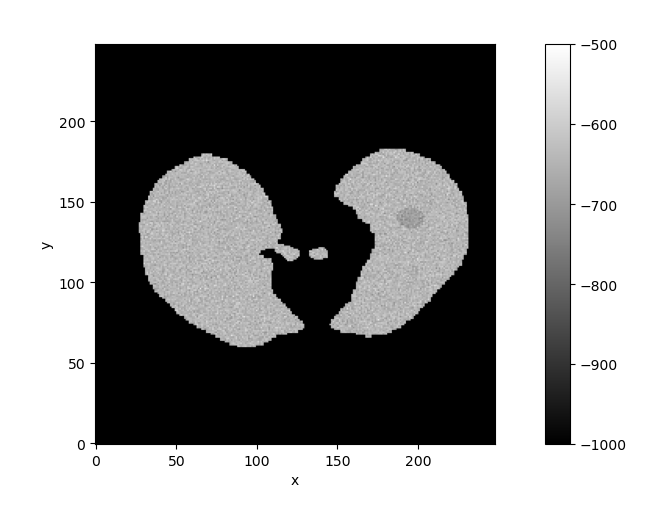

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

elasticity


<IPython.core.display.Javascript object>


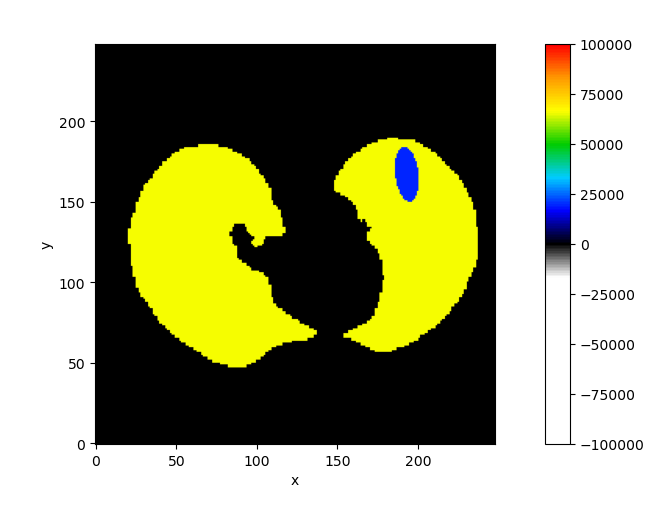

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

disp


<IPython.core.display.Javascript object>


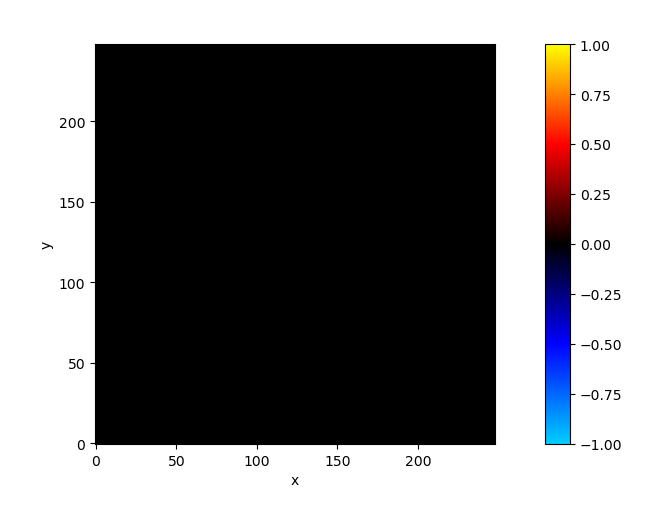

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

In [11]:
p = ps.phantoms[0]
p.load_niftis()
p.load_mesh(mesh_version=10)
project.visual.XArrayViewer(p.anat)
project.visual.XArrayViewer(p.elast)

disp = p.disp * (p.mask > 0)
disp.name = 'disp'
project.visual.XArrayViewer(disp)
p.mesh